# Todo:
* Alter the pipeline, split test train before tiling
* Class imbalance in when fitting.
* Adjust to the fit hyperparams set in the paper: 0.04;0.9
* Calculate AUC, by tiling and basic augmentation for shape.

## Pipeline

In [2]:
import pandas as pd 
import os
import glob
from sklearn.model_selection import train_test_split
from datetime import datetime

# Mac local path
root_path =  r'/Users/krish/ljmu/1.data/afo/'

In [3]:
len(glob.glob(root_path+'images/*.jpg'))

3641

In [4]:
total_images_df = pd.DataFrame(columns = ['file_name','humans','number_of_humans']) # A dataframe that contains all the images


for images_path in glob.glob(root_path+'images/*.jpg'):
    label_path = root_path+ '1category_labels/'+images_path.split('/')[-1].replace('.jpg','.txt')
    
    with open(label_path,'r') as fp:
        number_of_human = int(len(fp.readlines()))
    
    if (number_of_human == 0): 
        total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
    else:
        total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)

total_images_df.to_csv(root_path+'images/all_images.csv')

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

In [5]:
train_df, test_df = train_test_split(total_images_df, 
                                   test_size = 0.25, 
                                   random_state = 1998,
                                   stratify = total_images_df['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df.shape[0], 'validation', test_df.shape[0])

train_df.to_csv(root_path+'images/train.csv')
test_df.to_csv(root_path+'images/test.csv')

train 2730 validation 911


### Using the train csv to tile and train 

In [6]:
from pathlib import Path
from PIL import Image
import numpy as np
from shapely.geometry import Polygon, Point

In [7]:
Dont run # Long run tume prevents from running by accident

### Not sure what size should I tile to ..... The images are of better quality, so the objects are much smaller in size
# get all image names
#imnames = glob.glob('/Users/krish/ljmu/1.data/afo/images/*.jpg')
#imnames = glob.glob('/content/drive/MyDrive/ljmu/1.data/swimmers_dataset/krish_train/*.jpg')
# specify path for a new tiled dataset
newpath = '/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/'
#newpath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/ts'
falsepath = '/Users/krish/ljmu/1.data/afo/tiledv2/train/false/'
#falsepath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/false'
# python program to check if a path exists
#if path doesn’t exist we create a new path

#creating a new directory called pythondirectory
Path(newpath).mkdir(parents=True, exist_ok=True)
Path(falsepath).mkdir(parents=True, exist_ok=True)

# specify slice width=height
slice_size = 500

# tile all images in a loop

for imname in list(train_df['file_name']):
    im = Image.open(imname)
    imr = np.array(im, dtype=np.uint8)
    height = imr.shape[0]
    width = imr.shape[1]
    labname = imname.split('/')[-1].replace('.jpg', '.txt')
    labels = pd.read_csv(root_path+'1category_labels/'+labname, sep=' ', names=['class', 'x1', 'y1', 'w', 'h'])
    
    # we need to rescale coordinates from 0-1 to real image height and width
    labels[['x1', 'w']] = labels[['x1', 'w']] * width
    labels[['y1', 'h']] = labels[['y1', 'h']] * height
    
    boxes = []
    #print(labels)
    # convert bounding boxes to shapely polygons. We need to invert Y and find polygon vertices from center points
    for row in labels.iterrows():
        x1 = row[1]['x1'] - row[1]['w']/2
        y1 = (height - row[1]['y1']) - row[1]['h']/2
        x2 = row[1]['x1'] + row[1]['w']/2
        y2 = (height - row[1]['y1']) + row[1]['h']/2

        boxes.append((int(row[1]['class']), Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])))
    
    counter = 0
    print('Image:', imname)
    # create tiles and find intersection with bounding boxes for each tile
    for i in range((height // slice_size)):
        for j in range((width // slice_size)):
            x1 = j*slice_size
            y1 = height - (i*slice_size)
            x2 = ((j+1)*slice_size) - 1
            y2 = (height - (i+1)*slice_size) + 1

            pol = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
            imsaved = False
            slice_labels = []

            for box in boxes:
                if pol.intersects(box[1]):
                    inter = pol.intersection(box[1])        
                    
                    if not imsaved:
                        sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
                        sliced_im = Image.fromarray(sliced)
                        filename = imname.split('/')[-1]
                        ##filename = imname
                        slice_path = newpath + filename.replace('.jpg', f'_{i}_{j}.jpg')
                        
                        slice_labels_path = newpath + filename.replace('.jpg', f'_{i}_{j}.txt')
                        
                        print(slice_path)
                        #print('hi')
                        sliced_im.save(slice_path)
                        imsaved = True                    
                    
                    # get the smallest polygon (with sides parallel to the coordinate axes) that contains the intersection
                    new_box = inter.envelope 
                    
                    # get central point for the new bounding box 
                    centre = new_box.centroid
                    
                    # get coordinates of polygon vertices
                    x, y = new_box.exterior.coords.xy
                    
                    # get bounding box width and height normalized to slice size
                    new_width = (max(x) - min(x)) / slice_size
                    new_height = (max(y) - min(y)) / slice_size
                    
                    # we have to normalize central x and invert y for yolo format
                    new_x = (centre.coords.xy[0][0] - x1) / slice_size
                    new_y = (y1 - centre.coords.xy[1][0]) / slice_size
                    
                    counter += 1

                    slice_labels.append([box[0], new_x, new_y, new_width, new_height])
            
            # save txt with labels for the current tile
            if len(slice_labels) > 0:
                slice_df = pd.DataFrame(slice_labels, columns=['class', 'x1', 'y1', 'w', 'h'])
                #print(slice_df)
                slice_df.to_csv(slice_labels_path, sep=' ', index=False, header=False, float_format='%.6f')
            
            # if there are no bounding boxes intersect current tile, save this tile to a separate folder 
            if not imsaved:
                sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
                sliced_im = Image.fromarray(sliced)
                filename = imname.split('/')[-1]
                #filename = imname
                slice_path = falsepath + filename.replace('.jpg', f'_{i}_{j}.jpg')                

                sliced_im.save(slice_path)
                #print('Slice without boxes saved')
                imsaved = True
#     if counter == 100:
#         break

Image: /Users/krish/ljmu/1.data/afo/images/k3_69.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k3_69_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_173.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k3_82.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k3_82_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxe

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_1_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_1_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_2_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_2_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1032_3_2.jpg
/Users/krish/ljm

Image: /Users/krish/ljmu/1.data/afo/images/r2_55.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_55_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_55_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_55_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/d_416.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_416_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_416_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1256_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1256_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1256_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1256_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1256_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1256_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1256_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1256_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/j1_156.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j1_156_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j1_156_1_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes save

Image: /Users/krish/ljmu/1.data/afo/images/s2_396.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_296.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_296_2_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_317.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes sav

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_433_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_143.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_143_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_143_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/e_71.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_71_0_0.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_71_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_71_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_71_1_0.jpg
/Users/

Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_217_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_217_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_215.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_49.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_174.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_174_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice wi

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_394.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_394_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_394_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_394_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/tr

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k8_249_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/d_309.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_309_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_309_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_309_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_309_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_309_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_309_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_309_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_309_2_4.jpg
/Users/krish/ljm

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1173_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_104_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_104_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_186.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_186_1_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/c_101.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_101_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_101_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_101_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_101_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_101_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_

Image: /Users/krish/ljmu/1.data/afo/images/a_1023.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_0_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_1_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_1_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1023_2_3.jpg
/Users/krish/ljmu/1.dat

Image: /Users/krish/ljmu/1.data/afo/images/g_192.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_192_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_291.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_179.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_179_1_4.jpg
Slice without boxes saved
Slice without bo

Image: /Users/krish/ljmu/1.data/afo/images/k9_544.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k9_544_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k9_544_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_149.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_149_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_149_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_149_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_149_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_149_1_6.jpg
Slice without boxes sav

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_483_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_483_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_483_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_377.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_377_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Sl

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_1_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_43_2_5.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_213_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_213_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_422.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_422_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_422_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_422_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_422_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_422_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_422_2_3.j

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_349.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_465.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_101.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_101_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_101_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_101_0_3.jpg
/Users/krish/ljmu/1.data/afo/ti

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_110_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Us

Image: /Users/krish/ljmu/1.data/afo/images/w1_13.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_2_5.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_13_3_1.jpg
/Users/kr

Image: /Users/krish/ljmu/1.data/afo/images/w1_116.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_116_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_116_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_116_3_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_116_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_116_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/

Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_417_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_417_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_417_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_417_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_366.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_418.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_418_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/lj

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_0_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_2_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_90_3_0.jpg
/Users/krish/ljmu/1.data/

Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/d_336.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_336_3_0.jpg
/Users/krish/ljmu

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_179_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_179_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_356.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/d_311.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_311_0_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_311_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_311_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_311_1_3.jpg
/Users/krish/

Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_254_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_254_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_254_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_254_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_451.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_451_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_451_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1208.jpg
Slice without boxes saved
Slice 

Image: /Users/krish/ljmu/1.data/afo/images/a_1030.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_1_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_1_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1030_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_220_3_4.jpg
Slice without boxes saved


Image: /Users/krish/ljmu/1.data/afo/images/s5_405.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_405_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_107.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_107_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_107_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_107_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_107_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_107_2_0.jpg
/Users/krish/ljmu/1.data/afo/til

Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_14_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_227.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_227_1_0.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_227_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_214.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_214_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved

Image: /Users/krish/ljmu/1.data/afo/images/r3_458.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_458_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_458_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_458_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_458_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z1_51.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z1_51_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/e_74.jpg
/Users/krish/ljmu

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_88_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes 

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_422_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_422_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_422_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_422_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r2_53.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_53_1

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_1_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_327_3_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice with

Image: /Users/krish/ljmu/1.data/afo/images/k1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k1_1_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k1_1_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_343.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_343_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_343_1_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_343_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_343_1_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_343_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Sli

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_2_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1237_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_123

Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_107.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_61.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_61_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_61_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_61_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_61_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_61_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_31_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_31_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_31_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_180.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_180_1_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_95.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.d

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_310_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_310_3_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_310_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_310_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/d_433.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_433_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_433_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_433_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_433_1_5

Image: /Users/krish/ljmu/1.data/afo/images/j2_245.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_245_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_245_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_245_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_201.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w2_231.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_231_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes sa

Image: /Users/krish/ljmu/1.data/afo/images/b1_144.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_144_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_144_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_144_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_144_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_144_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_144_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_144_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_144_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w2_240.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_240_1_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_240_2_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_240_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice wit

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_2_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1252_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_178.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_178_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_178_0_3.jpg
Slice without boxes saved
Slice 

Image: /Users/krish/ljmu/1.data/afo/images/s2_313.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_367.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_371.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_125.jpg
/Use

Image: /Users/krish/ljmu/1.data/afo/images/r3_260.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_260_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_260_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_260_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/g_41.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_41_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_41_1_1.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_369.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes

Image: /Users/krish/ljmu/1.data/afo/images/g_151.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_151_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/c_75.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_75_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_75_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_75_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_75_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_75_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_75_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_75_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_75_2_2.jpg

Image: /Users/krish/ljmu/1.data/afo/images/d_358.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_358_1_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_358_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_358_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_358_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_358_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_358_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_358_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_358_3_4.jpg

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_239_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k5_79.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_79_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_79_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_79_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_244.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_118.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
S

Image: /Users/krish/ljmu/1.data/afo/images/c_145.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_145_2_5.jpg
Slice without boxes

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_2_5.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_3_3.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_48_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_22.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_22_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_22_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/

Image: /Users/krish/ljmu/1.data/afo/images/k4_183.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_183_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_183_1_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_183_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1040.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1040_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1040_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1040_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1040_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1040_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1040_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1040_1_2.jpg
/Users/krish/ljmu/1.da

Image: /Users/krish/ljmu/1.data/afo/images/k6_231.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_231_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_231_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_231_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_37.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_375.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_375_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.dat

Image: /Users/krish/ljmu/1.data/afo/images/w1_16.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_16_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_16_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_16_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_16_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_16_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_16_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_16_3_5.jpg
Slice w

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_227_3_4.jpg
Slice without boxes saved
Slice wi

Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_98.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_98_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_98_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_98_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_98_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_98_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_98_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_98_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice w

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_404_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_404_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_404_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_404_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_404_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_36.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_36_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/trai

Image: /Users/krish/ljmu/1.data/afo/images/w2_19.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_19_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_19_1_3.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_19_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_19_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_453.jpg
Slice without boxes saved
Sli

Image: /Users/krish/ljmu/1.data/afo/images/e_14.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_0_3.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_1_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_1_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_2_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_14_2_5.jpg

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_76_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_76_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_76_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_78.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_11.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_11_0_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_11_0_3.

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_328.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_328_1_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_328_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_172.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_433.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without 

Image: /Users/krish/ljmu/1.data/afo/images/k5_13.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_13_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_13_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_13_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_13_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z3_50.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z3_50_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z3_50_1_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z3_50_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k9_533.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slic

Image: /Users/krish/ljmu/1.data/afo/images/w2_106.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_106_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_106_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_106_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_106_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_106_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_106_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_106_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_106_3_3.jpg
Slice without bo

Image: /Users/krish/ljmu/1.data/afo/images/b1_122.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_2_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_122_2_6.jpg
/Users/krish/lj

Image: /Users/krish/ljmu/1.data/afo/images/d_429.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_429_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without box

Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_19_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_19_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_19_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_261.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_261_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1093.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/af

Image: /Users/krish/ljmu/1.data/afo/images/a_1084.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_0_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1084_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice w

Image: /Users/krish/ljmu/1.data/afo/images/b1_117.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_117_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_117_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_117_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_117_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_117_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_117_3_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_117_3_5.jpg

Image: /Users/krish/ljmu/1.data/afo/images/a_164.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_164_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z2_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Sli

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1096_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_34.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved

Image: /Users/krish/ljmu/1.data/afo/images/a_1245.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_0_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1245_2_3.jpg
/Users/krish/ljmu/1.dat

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_29_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_29_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i3_135.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_135_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_135_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_135_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_135_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_122.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice wi

Image: /Users/krish/ljmu/1.data/afo/images/b1_196.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_196_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_196_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_196_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_196_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_196_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_196_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_196_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_196_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_3_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_109_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_29.jpg
Slice wi

Image: /Users/krish/ljmu/1.data/afo/images/a_1048.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_1_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1048_2_4.jpg
/Users/krish/ljmu/1.data/afo/til

Image: /Users/krish/ljmu/1.data/afo/images/w2_31.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_31_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_31_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_31_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_31_3_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_31_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_31_3_6.jpg
Image: /Users/k

Image: /Users/krish/ljmu/1.data/afo/images/g_69.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_69_1_1.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_131.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_330.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_330_0_3.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_330_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_189.jpg
Slice w

Image: /Users/krish/ljmu/1.data/afo/images/k7_531.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k7_531_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1227.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1227_1_3.

Image: /Users/krish/ljmu/1.data/afo/images/c_96.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_96_3_

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_27_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1150.jpg
Slice without boxes saved
Slice without bo

Image: /Users/krish/ljmu/1.data/afo/images/a_345.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_345_2_5.jpg
Slice without boxes

Image: /Users/krish/ljmu/1.data/afo/images/r4_20.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_20_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_20_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_20_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/c_91.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_91_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_91_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_91_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_91_1_2.jpg
/Users/kris

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z1_44_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_80.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_80_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_80_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_80_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_80_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_80_2_4.jpg
Slice without boxes saved
Slice without b

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/c_116.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_116_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_116_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_116_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_116_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_116_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_116_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/trai

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/dv_1409_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/dv_1409_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/dv_1409_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/dv_1409_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/dv_1409_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/dv_1409_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/dv_1409_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w1_275.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_275_0_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_275_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_275_0_3.jpg
Slice without boxes saved
/Users/krish/ljmu

Image: /Users/krish/ljmu/1.data/afo/images/ev_546.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/ev_546_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/ev_546_2_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/ev_546_3_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_249.jpg
Slice without boxes saved
Slice without boxes saved
Slice w

Image: /Users/krish/ljmu/1.data/afo/images/s2_176.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1248.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_0_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1248_1_4.jpg
/User

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_403_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_403_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_403_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_403_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_403_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_248.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/lj

Image: /Users/krish/ljmu/1.data/afo/images/a_1203.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1203_2_4.j

Image: /Users/krish/ljmu/1.data/afo/images/e_61.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_0_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_1_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_2_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_61_2_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/til

Image: /Users/krish/ljmu/1.data/afo/images/a_130.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/e_49.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_49_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_49_0_2.jpg
Slice without boxes sav

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k5_31.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_31_0_1.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_31_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_31_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_31_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_58.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_353.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Sl

Image: /Users/krish/ljmu/1.data/afo/images/a_1215.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1215_2_3.jpg
/Users/krish/ljmu/1.dat

Image: /Users/krish/ljmu/1.data/afo/images/r4_42.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_42_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_42_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_42_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_42_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_42_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_71.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_71_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_71_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_71_1_1.jp

Image: /Users/krish/ljmu/1.data/afo/images/s1_274.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/g_182.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_182_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_182_0_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_182_1_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_182_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1113.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1113_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1113_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1113_0_5.jpg
/Users/krish/ljmu/1.data/a

Image: /Users/krish/ljmu/1.data/afo/images/d_299.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_299_0_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_299_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_299_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_299_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_299_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_299_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_299_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_299_3_3.jpg
/Users/krish/ljmu/1.data/

Image: /Users/krish/ljmu/1.data/afo/images/a_1236.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1236_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1

Image: /Users/krish/ljmu/1.data/afo/images/z3_70.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_104.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_104_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_104_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_104_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice withou

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1013_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1013_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1013_2_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1013_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1013_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1013_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1013_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z1_52.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z1_52_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/e_94.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_94_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/

Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_247_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_247_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w2_22.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_22_1_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_22_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w2_22_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.d

Image: /Users/krish/ljmu/1.data/afo/images/e_84.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_1_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_2_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_84_2_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1080_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1080_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1080_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1080_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1080_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1080_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_285.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice wi

Image: /Users/krish/ljmu/1.data/afo/images/a_1229.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1229_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_100_2_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_100_3_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_100_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_100_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_100_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_165.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_125.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_125_0_6.jpg
Slice without boxes saved
Slice witho

Image: /Users/krish/ljmu/1.data/afo/images/r3_392.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_392_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_392_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_392_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_392_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_392_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z2_3_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/

Image: /Users/krish/ljmu/1.data/afo/images/r2_23.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_23_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_23_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_23_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_23_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_98.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_98_1_0.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_98_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_98_1_4.jpg
Image:

Image: /Users/krish/ljmu/1.data/afo/images/a_105.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_105_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_105_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_105_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i3_151.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_151_0_0.jpg
/U

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_65_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_65_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_65_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_65_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_236.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_236_1_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_236_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_236_1_5.jpg
Sli

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_2_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1042_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_33.jpg
Slice without boxes saved
Slice without boxes save

Image: /Users/krish/ljmu/1.data/afo/images/a_1119.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1119_2_4.jpg
/Users/krish/ljmu/1.data/afo/til

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_15_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_15_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_15_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_15_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_440.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_440_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_440_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_193.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice with

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_72_1_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_72_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_72_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_72_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_72_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_72_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_72_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i1_14.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_14_0_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_1_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_2_0.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_3_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_10_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
S

Image: /Users/krish/ljmu/1.data/afo/images/s2_321.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_321_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/j2_45.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_45_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_45_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_45_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_45_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_45_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_437.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice with

Image: /Users/krish/ljmu/1.data/afo/images/s5_383.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_383_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_383_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_62.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_62_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_62_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_62_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_306.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without box

Image: /Users/krish/ljmu/1.data/afo/images/s5_227.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_184.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/d_451.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_451_1_2.jpg
/Users/krish/ljmu/1.data/

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_177.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_177_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_177_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_177_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_177_2_5.jpg
Slice without boxes saved
Slice without boxes saved


Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_296.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_296_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_296_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k4_192.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_192_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_192_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_192_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_393.jpg
Slice without boxes saved
Slice without

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_115.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_115_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_235.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved

Image: /Users/krish/ljmu/1.data/afo/images/k1_40.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k1_40_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k1_40_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k1_40_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_419.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_419_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_419_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_419_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_419_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_419_

Image: /Users/krish/ljmu/1.data/afo/images/a_349.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_349_2_5.jpg
Slice without boxes

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_273_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_127.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_127_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice w

Image: /Users/krish/ljmu/1.data/afo/images/i3_168.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k8_238.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k8_238_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k8_238_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_200.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/tra

Image: /Users/krish/ljmu/1.data/afo/images/s2_352.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i2_161.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i2_161_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i2_161_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i2_161_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i2_161_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i2_161_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_251.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_180.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_180_1_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_180_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_336.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_194.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/l

Image: /Users/krish/ljmu/1.data/afo/images/a_1160.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1160_2_4.jpg
Slice without boxes saved
/Users

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_376_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_376_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_87.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_87_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_87_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_87_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes s

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1134_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1134_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1134_2_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1134_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1134_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1134_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_46.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1211.jpg
Slice without boxes saved
/Users/

Image: /Users/krish/ljmu/1.data/afo/images/d_343.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_343_3_1.jpg
Slice without boxes saved
Slice without box

Image: /Users/krish/ljmu/1.data/afo/images/a_1228.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1228_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_400_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_400_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/c_94.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_94_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_94_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_94_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_94_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_94_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_94_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_94_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_9

Image: /Users/krish/ljmu/1.data/afo/images/k4_189.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_189_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_189_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_199.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_199_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_199_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_199_2_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_157.jpg
Slice without

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_165_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_165_2_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1251.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1251_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1251_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1251_0_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1251_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1251_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1251_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1251_1_4.jpg
/Users/

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_208_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_208_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_208_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_434.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_434_2_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Sl

Image: /Users/krish/ljmu/1.data/afo/images/f_99.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_0_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_0_5.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/f_99_2_5.jpg
/Users/krish/ljmu/1.data/afo/til

Image: /Users/krish/ljmu/1.data/afo/images/k2_67.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k2_67_0_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k2_67_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k2_67_0_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k2_67_1_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k2_67_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i3_163.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_163_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_163_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_163_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_13.jpg
Slice without boxes saved
Slice without boxes

Image: /Users/krish/ljmu/1.data/afo/images/b1_135.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_135_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_135_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_135_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_135_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_135_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_135_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /

Image: /Users/krish/ljmu/1.data/afo/images/r2_37.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_37_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_37_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_37_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_159.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_159_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_159_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_159_1_3.jpg
Slice with

Image: /Users/krish/ljmu/1.data/afo/images/b1_158.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_158_2_6.jpg
Slice without boxes saved
Slice without boxes save

Image: /Users/krish/ljmu/1.data/afo/images/s5_379.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_379_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_70.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_292.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu

Image: /Users/krish/ljmu/1.data/afo/images/k3_66.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k3_66_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_423.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_423_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_423_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_290.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice w

Image: /Users/krish/ljmu/1.data/afo/images/z1_49.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z1_49_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_267.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_267_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_267_2_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_145.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice w

Image: /Users/krish/ljmu/1.data/afo/images/s2_187.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_187_1_1.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_187_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_85.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_85_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_85_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_85_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k2_59.jpg
Slice without boxe

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_206_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_206_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_206_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_206_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_206_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_206_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_206_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i3_152.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_152_0_1.jpg
/Users/krish/ljm

Image: /Users/krish/ljmu/1.data/afo/images/s2_152.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_152_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_265.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_409.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_409_1_2.jpg
Slice without boxes saved
Slice without 

Image: /Users/krish/ljmu/1.data/afo/images/s2_216.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_216_0_1.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_216_0_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_216_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_253.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_253_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k6_186.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_186_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_186_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_186_0_2

Image: /Users/krish/ljmu/1.data/afo/images/r3_70.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_70_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_70_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i3_157.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_157_0_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_157_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_157_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_157_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo

Image: /Users/krish/ljmu/1.data/afo/images/z2_21.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z2_21_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z2_21_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r2_74.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_74_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_74_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_74_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_98.jpg
Slice without boxes sa

Image: /Users/krish/ljmu/1.data/afo/images/s5_69.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_14.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_14_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_14_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_14_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_54.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice witho

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_1_5.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_2_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_37_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/tr

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_56_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_56_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_56_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/g_178.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_178_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_178_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_178_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1033.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1033_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1033_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1033_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1033_0_5.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/a_106.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_106_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_106_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_106_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_103.jpg
Slice without boxes saved
Slice without boxes saved
Slice witho

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_168_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_168_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_168_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_168_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_168_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_168_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_168_3_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_252.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_252_1_2.jpg
Slice without bo

Image: /Users/krish/ljmu/1.data/afo/images/a_1131.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1131_2_4.jpg
/Users/krish/ljmu/1.data/afo/til

Image: /Users/krish/ljmu/1.data/afo/images/k5_12.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_12_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_12_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_12_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_12_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_265.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_265_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_265_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_265_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Sl

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_338_2_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_338_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_338_3_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_338_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_153.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_2_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1155_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_170.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_170_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_1

Image: /Users/krish/ljmu/1.data/afo/images/kb_36.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_43.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_43_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_178.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_178_1_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/

Image: /Users/krish/ljmu/1.data/afo/images/w1_434.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_434_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_434_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w2_208.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without bo

Image: /Users/krish/ljmu/1.data/afo/images/w1_387.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_387_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_387_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_387_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_387_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_387_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_387_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_387_2_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_387_3_0.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train

Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_442_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_442_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_442_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_442_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/d_290.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_290_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_290_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_290_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_290_1_3

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_118.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_118_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_116.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_116_1_2.jpg
Slice without bo

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1206_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/

Image: /Users/krish/ljmu/1.data/afo/images/a_1242.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_0_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1242_2_3.jpg
/Users/krish/ljmu/1.dat

Image: /Users/krish/ljmu/1.data/afo/images/r3_162.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_162_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_162_2_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_186.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_186_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice w

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_253

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_414_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_414_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_50.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1088.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1088_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_320_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_320_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_320_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_320_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_320_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_320_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_320_3_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_222.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_222_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes sav

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_248_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_248_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_6_0_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_6_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_6_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_6_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_6_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/cv_1503.jpg
Slice without boxes saved
Slice without boxes saved
Slice wi

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_204.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_204_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_204_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_204_2_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_229.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_229_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_229_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/trai

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_202.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1112.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1112_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1112_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1112_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1112_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1112_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/trai

Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k1_15.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k1_15_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k1_15_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k1_15_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_101.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_101_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_301.jpg
/

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_29_0_1.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_29_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_29_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k5_29_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1175.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1175_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1175_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1175_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1175_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1175_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1175_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1175_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/c_119.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_119_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_119_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_119_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_119_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_119_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_119_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_119_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_119_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved

Image: /Users/krish/ljmu/1.data/afo/images/i3_136.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_136_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_136_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_136_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i3_136_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_280.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_280_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_280_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_280_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes sav

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_132_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_132_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_132_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_132_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_132_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_132_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_398.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_398_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/g_188.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes save

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_168.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s2_168_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/c_93.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_93_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_93_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_93_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_67_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2

Image: /Users/krish/ljmu/1.data/afo/images/e_63.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_0_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_0_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_2_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_2_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_63_2_6.jpg
Slice without boxes saved
/Users/krish/

Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z3_51.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z3_51_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/z3_51_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_20.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k4_177.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_177_0_4.jpg
Slice without boxes saved
Slice wit

Image: /Users/krish/ljmu/1.data/afo/images/k4_158.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_158_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_158_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k4_158_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/b1_60.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_60_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_60_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_60_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_60_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/b1_60_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes 

Image: /Users/krish/ljmu/1.data/afo/images/c_83.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_83_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.

Image: /Users/krish/ljmu/1.data/afo/images/d_312.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_312_3_0.jpg
S

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_1_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_1_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_2_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_2_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1037_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_103

Image: /Users/krish/ljmu/1.data/afo/images/s5_296.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_307.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_307_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_307_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_307_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_307_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_307_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_307_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_307_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_307_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_3

Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_233_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/j1_161.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j1_161_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j1_161_1_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/c_71.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_71_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_71_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/c_71_0_4.jpg
Slice without boxes saved
Slice without 

Image: /Users/krish/ljmu/1.data/afo/images/s1_179.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_179_1_0.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_179_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s1_179_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r3_264.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_264_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_264_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z2_16.jpg
Slice without 

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_262.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_203.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_438.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_438_1_1.j

Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_445.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_445_2_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z1_43.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Sl

Image: /Users/krish/ljmu/1.data/afo/images/e_7.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_1_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_1_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_2_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_2_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/e_7_3_0.jpg
/Users/krish/ljmu/1.data/

Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_190.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_190_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_190_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_134.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without box

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_332_3_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/kri

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k8_244_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k8_244_1_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_9.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/g_147.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_147_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_8.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice witho

Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_449.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_449_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_449_2_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_449_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_449_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_278.jpg
Sli

Image: /Users/krish/ljmu/1.data/afo/images/d_444.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_444

Image: /Users/krish/ljmu/1.data/afo/images/a_386.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386_2_5.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_386

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_419.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/s5_419_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s1_263.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_163.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_163_0_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without bo

Image: /Users/krish/ljmu/1.data/afo/images/a_326.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_0_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_1_3.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_1_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_2_5.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_326_3_0.jpg
Slice without boxes saved
Slice wit

Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k2_40.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k2_40_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k2_40_0_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w1_102.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_102_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_102_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_102_2_0.jpg
/Users/krish/ljmu/

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_354_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_354_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_354_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_354_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_354_3_5.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/i1_11.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_11_0_2.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_11_0_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_11_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_11_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/i1_11_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_346.jpg
Slice without boxes saved
/Users/k

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_0_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_1_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_2_5.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_439_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z1_50.jpg
Slice without box

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_464_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_464_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_464_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_464_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_464_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w1_394.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_394_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_394_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/

Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_145_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/a_1053.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_0_6.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_1_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1053_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/

Image: /Users/krish/ljmu/1.data/afo/images/r3_180.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_180_0_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_180_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_208.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/w2_234.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without 

Image: /Users/krish/ljmu/1.data/afo/images/w1_179.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_179_1_4.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_179_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_179_2_1.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_179_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_179_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_179_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_179_3_4.jpg
Slice without boxes saved

Image: /Users/krish/ljmu/1.data/afo/images/g_34.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/g_34_1_0.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/r4_94.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_94_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_94_2_2.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_238.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice withou

Image: /Users/krish/ljmu/1.data/afo/images/w1_157.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_157_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/w1_157_1_2.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxe

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_1_4.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_1_6.jpg
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_2_6.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/a_1052_3_4.jpg
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/z1_47.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r3_226_1_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_287.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_26.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1

/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_36_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r2_36_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/k6_189.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_189_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_189_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_189_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_189_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/k6_189_1_0.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/j2_248.jpg
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/j2_248_0_1.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train

Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_43_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_43_1_3.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/r4_43_2_3.jpg
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/s5_159.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Image: /Users/krish/ljmu/1.data/afo/images/d_322.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/

Image: /Users/krish/ljmu/1.data/afo/images/d_289.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289_0_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289_1_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289_2_4.jpg
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
Slice without boxes saved
/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/d_289

## Model fitting

**Without tiling**

In [66]:
result_root = r'/Users/krish/ljmu/3.results/19112022-new_pipeline-resnet50/'
Path(result_root).mkdir(parents=True, exist_ok=True)

In [67]:
from tensorflow.keras import layers
from keras_preprocessing.image import ImageDataGenerator

In [68]:
actual_train = pd.read_csv(root_path+'images/train.csv')

In [69]:
actual_train['humans'] = actual_train.humans.apply(lambda x: str(x))

In [70]:
train_df, valid_df = train_test_split(actual_train, 
                                   test_size = 0.15, 
                                   random_state = 1998,
                                   stratify = actual_train['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 2320 validation 410


In [71]:
# Rotation_range - random rotation within the angle mentioned
# Random_shifts - shifts 20% at max. to the horizontal and vertical(reduce to 10% as already diverse data)
# Random_flip - random flips 
# fill_mode - fill the blank pixels, when augmenting with the nearest color
datagen = ImageDataGenerator(rotation_range = 360,
                             width_shift_range=0.1, height_shift_range=0.1,
                             #horizontal_flip=True, vertical_flip=True, # Isnt much useful for us
                             brightness_range=[0.5,1.5],
                             rescale=1./255.,fill_mode='nearest')

train_generator = datagen.flow_from_dataframe(dataframe=train_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)
valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)

Found 2320 validated image filenames belonging to 2 classes.
Found 410 validated image filenames belonging to 2 classes.


In [72]:
import tensorflow as tf

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [73]:
# Why I have this as false : https://stackoverflow.com/questions/46036522/defining-model-in-keras-include-top-true
# So that I can list out the number of classes that I have

vgg_16 = tf.keras.applications.resnet50.ResNet50(input_shape=(224 , 224, 3),
                                           include_top=False, 
                                           weights='imagenet')

model = Sequential()
model.add(vgg_16)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))

model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))

model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))



model.add(Dense(1, activation="sigmoid" , name="classification"))

In [74]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.004,momentum=0.9), 
            loss='BinaryCrossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 1024)              525312    
                                                      

In [75]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta = 0.5)

In [76]:
class_weight = {0:train_df['humans'].value_counts()[0]/train_df.shape[0],1:train_df['humans'].value_counts()[1]/train_df.shape[0],}

In [77]:
history = model.fit(train_generator, validation_data = valid_generator, epochs = 10, class_weight=class_weight,callbacks=[es])

Epoch 1/10


2022-11-19 15:06:23.940738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - ETA: 0s - loss: 0.1770 - accuracy: 0.7246

2022-11-19 15:08:30.253732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - 148s 1s/step - loss: 0.1770 - accuracy: 0.7246 - val_loss: 0.5212 - val_accuracy: 0.8000
Epoch 2/10
97/97 [==============================] - 147s 2s/step - loss: 0.0911 - accuracy: 0.8504 - val_loss: 0.5355 - val_accuracy: 0.7976
Epoch 3/10
97/97 [==============================] - 159s 2s/step - loss: 0.0676 - accuracy: 0.8866 - val_loss: 0.4743 - val_accuracy: 0.7976
Epoch 4/10
97/97 [==============================] - 166s 2s/step - loss: 0.0605 - accuracy: 0.9026 - val_loss: 0.4953 - val_accuracy: 0.7976
Epoch 5/10
97/97 [==============================] - 165s 2s/step - loss: 0.0580 - accuracy: 0.9043 - val_loss: 0.9995 - val_accuracy: 0.2415
Epoch 6/10
97/97 [==============================] - 156s 2s/step - loss: 0.0553 - accuracy: 0.9125 - val_loss: 0.6701 - val_accuracy: 0.6244


In [78]:
now = datetime.now()
date_time = now.strftime("%d%m%Y-%H%M")
model.save(result_root+date_time+'-ResNet+notile+augmentation_10epochs_afo')

INFO:tensorflow:Assets written to: /Users/krish/ljmu/1.data/afo/3.results/19112022-new_pipeline-resnet50/19112022-1522-ResNet+notile+augmentation_10epochs_afo/assets


INFO:tensorflow:Assets written to: /Users/krish/ljmu/1.data/afo/3.results/19112022-new_pipeline-resnet50/19112022-1522-ResNet+notile+augmentation_10epochs_afo/assets


**using tiling data**

In [79]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/train/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/train/false/*.jpg')
df_false.humans = 0

tiled_train = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/3331724966.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_train = df_true.append(df_false)


In [80]:
tiled_train['humans'] = tiled_train.humans.apply(lambda x: str(x))

In [81]:
tiled_train

file_name humans
0      /Users/krish/ljmu/1.data/afo/tiledv2/train/ts/...      1
1      /Users/krish/ljmu/1.data/afo/tiledv2/train/ts/...      1
2      /Users/krish/ljmu/1.data/afo/tiledv2/train/ts/...      1
3      /Users/krish/ljmu/1.data/afo/tiledv2/train/ts/...      1
4      /Users/krish/ljmu/1.data/afo/tiledv2/train/ts/...      1
...                                                  ...    ...
33230  /Users/krish/ljmu/1.data/afo/tiledv2/train/fal...      0
33231  /Users/krish/ljmu/1.data/afo/tiledv2/train/fal...      0
33232  /Users/krish/ljmu/1.data/afo/tiledv2/train/fal...      0
33233  /Users/krish/ljmu/1.data/afo/tiledv2/train/fal...      0
33234  /Users/krish/ljmu/1.data/afo/tiledv2/train/fal...      0

[46700 rows x 2 columns]

In [82]:
train_df, valid_df = train_test_split(tiled_train, 
                                   test_size = 0.15, 
                                   random_state = 1998,
                                   stratify = tiled_train['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 39695 validation 7005


In [83]:
# Rotation_range - random rotation within the angle mentioned
# Random_shifts - shifts 20% at max. to the horizontal and vertical(reduce to 10% as already diverse data)
# Random_flip - random flips 
# fill_mode - fill the blank pixels, when augmenting with the nearest color
datagen = ImageDataGenerator(rotation_range = 360,
                             width_shift_range=0.1, height_shift_range=0.1,
                             #horizontal_flip=True, vertical_flip=True, # Isnt much useful for us
                             brightness_range=[0.5,1.5],
                             rescale=1./255.,fill_mode='nearest')

train_generator = datagen.flow_from_dataframe(dataframe=train_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)
valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)

Found 39695 validated image filenames belonging to 2 classes.
Found 7005 validated image filenames belonging to 2 classes.


In [84]:
# Why I have this as false : https://stackoverflow.com/questions/46036522/defining-model2-in-keras-include-top-true
# So that I can list out the number of classes that I have

vgg_16 = tf.keras.applications.resnet50.ResNet50(input_shape=(224 , 224, 3),
                                           include_top=False, 
                                           weights='imagenet')

model2 = Sequential()
model2.add(vgg_16)
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())
model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))

model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))

model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))



model2.add(Dense(1, activation="sigmoid" , name="classification"))

In [85]:
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.004,momentum=0.9), 
            loss='BinaryCrossentropy',
            metrics = ['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dense_20 (Dense)            (None, 1024)              525312    
                                                      

In [86]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta = 0.5)

In [87]:
class_weight = {0:train_df['humans'].value_counts()[0]/train_df.shape[0],1:train_df['humans'].value_counts()[1]/train_df.shape[0],}

In [88]:
history2 = model2.fit(train_generator, validation_data = valid_generator, epochs = 10, class_weight=class_weight,callbacks=[es])

Epoch 1/10


2022-11-19 15:22:19.427167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1654/1654 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.9072

2022-11-19 15:49:56.050032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1654/1654 [==============================] - 1762s 1s/step - loss: 0.0915 - accuracy: 0.9072 - val_loss: 0.2141 - val_accuracy: 0.9308
Epoch 2/10
1654/1654 [==============================] - 1859s 1s/step - loss: 0.0678 - accuracy: 0.9382 - val_loss: 0.1927 - val_accuracy: 0.9443
Epoch 3/10
1654/1654 [==============================] - 1985s 1s/step - loss: 0.0628 - accuracy: 0.9420 - val_loss: 0.1886 - val_accuracy: 0.9436
Epoch 4/10
1654/1654 [==============================] - 1977s 1s/step - loss: 0.0593 - accuracy: 0.9440 - val_loss: 0.2206 - val_accuracy: 0.9335


In [89]:
now = datetime.now()
date_time = now.strftime("%d%m%Y-%H%M")
model2.save(result_root+date_time+'-ResNet+tile+augmentation_10epochs_afo')

INFO:tensorflow:Assets written to: /Users/krish/ljmu/1.data/afo/3.results/19112022-new_pipeline-resnet50/19112022-1728-ResNet+tile+augmentation_10epochs_afo/assets


INFO:tensorflow:Assets written to: /Users/krish/ljmu/1.data/afo/3.results/19112022-new_pipeline-resnet50/19112022-1728-ResNet+tile+augmentation_10epochs_afo/assets


**I am not sure how I got 75 auc score for model 1. The paper got only 40ish. maybe is it because of any augmentation at all** 
#### Model3 without any augmentation

In [120]:
actual_train = pd.read_csv(root_path+'images/train.csv')
actual_train['humans'] = actual_train.humans.apply(lambda x: str(x))
train_df, valid_df = train_test_split(actual_train, 
                                   test_size = 0.15, 
                                   random_state = 1998,
                                   stratify = actual_train['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

# Rotation_range - random rotation within the angle mentioned
# Random_shifts - shifts 20% at max. to the horizontal and vertical(reduce to 10% as already diverse data)
# Random_flip - random flips 
# fill_mode - fill the blank pixels, when augmenting with the nearest color
# datagen = ImageDataGenerator(rotation_range = 360,
#                              width_shift_range=0.1, height_shift_range=0.1,
#                              #horizontal_flip=True, vertical_flip=True, # Isnt much useful for us
#                              brightness_range=[0.5,1.5],
#                              rescale=1./255.,fill_mode='nearest')

datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = datagen.flow_from_dataframe(dataframe=train_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)
valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)

train 2320 validation 410
Found 2320 validated image filenames belonging to 2 classes.
Found 410 validated image filenames belonging to 2 classes.


In [121]:
import tensorflow as tf

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [122]:
# Why I have this as false : https://stackoverflow.com/questions/46036522/defining-model3-in-keras-include-top-true
# So that I can list out the number of classes that I have

vgg_16 = tf.keras.applications.resnet50.ResNet50(input_shape=(224 , 224, 3),
                                           include_top=False, 
                                           weights='imagenet')

model3 = Sequential()
model3.add(vgg_16)
model3.add(GlobalAveragePooling2D())
model3.add(Flatten())
model3.add(Dense(1024, activation="relu"))
model3.add(Dense(512, activation="relu"))

model3.add(Dense(1024, activation="relu"))
model3.add(Dense(512, activation="relu"))

model3.add(Dense(1024, activation="relu"))
model3.add(Dense(512, activation="relu"))



model3.add(Dense(1, activation="sigmoid" , name="classification"))

In [123]:
model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.004,momentum=0.9), 
            loss='BinaryCrossentropy',
            metrics = ['accuracy'])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dense_26 (Dense)            (None, 1024)              525312    
                                                      

In [124]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta = 0.5)

In [125]:
class_weight = {0:train_df['humans'].value_counts()[0]/train_df.shape[0],1:train_df['humans'].value_counts()[1]/train_df.shape[0],}

In [126]:
history3 = model3.fit(train_generator, validation_data = valid_generator, epochs = 10, class_weight=class_weight,callbacks=[es])

Epoch 1/10


2022-11-20 18:16:36.098279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - ETA: 0s - loss: 0.1642 - accuracy: 0.7806

2022-11-20 18:18:23.592482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - 129s 1s/step - loss: 0.1642 - accuracy: 0.7806 - val_loss: 0.6694 - val_accuracy: 0.7976
Epoch 2/10
97/97 [==============================] - 134s 1s/step - loss: 0.0632 - accuracy: 0.8987 - val_loss: 0.5215 - val_accuracy: 0.8000
Epoch 3/10
97/97 [==============================] - 149s 2s/step - loss: 0.0339 - accuracy: 0.9500 - val_loss: 1.3972 - val_accuracy: 0.2000
Epoch 4/10
97/97 [==============================] - 166s 2s/step - loss: 0.0218 - accuracy: 0.9711 - val_loss: 0.5393 - val_accuracy: 0.8000
Epoch 5/10
97/97 [==============================] - 153s 2s/step - loss: 0.0167 - accuracy: 0.9776 - val_loss: 4.8477 - val_accuracy: 0.2000
Epoch 6/10
97/97 [==============================] - 149s 2s/step - loss: 0.0191 - accuracy: 0.9763 - val_loss: 0.5800 - val_accuracy: 0.7390


In [127]:
now = datetime.now()
date_time = now.strftime("%d%m%Y-%H%M")
model3.save(result_root+date_time+'-ResNet+notile+noaugmentation_10epochs_afo')

INFO:tensorflow:Assets written to: /Users/krish/ljmu/1.data/afo/3.results/19112022-new_pipeline-resnet50/20112022-1831-ResNet+notile+noaugmentation_10epochs_afo/assets


INFO:tensorflow:Assets written to: /Users/krish/ljmu/1.data/afo/3.results/19112022-new_pipeline-resnet50/20112022-1831-ResNet+notile+noaugmentation_10epochs_afo/assets


## Metrics


In [92]:
# Test data prep
Dont run # Long run tume prevents from running by accident

### Not sure what size should I tile to ..... The images are of better quality, so the objects are much smaller in size
# get all image names
#imnames = glob.glob('/Users/krish/ljmu/1.data/afo/images/*.jpg')
#imnames = glob.glob('/content/drive/MyDrive/ljmu/1.data/swimmers_dataset/krish_train/*.jpg')
# specify path for a new tiled dataset
newpath = '/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/'
#newpath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/ts'
falsepath = '/Users/krish/ljmu/1.data/afo/tiledv2/test/false/'
#falsepath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/false'
# python program to check if a path exists
#if path doesn’t exist we create a new path

#creating a new directory called pythondirectory
Path(newpath).mkdir(parents=True, exist_ok=True)
Path(falsepath).mkdir(parents=True, exist_ok=True)

# specify slice width=height
slice_size = 500

# tile all images in a loop
test_df = pd.read_csv(root_path+'images/test.csv')
for imname in list(test_df['file_name']):
    im = Image.open(imname)
    imr = np.array(im, dtype=np.uint8)
    height = imr.shape[0]
    width = imr.shape[1]
    labname = imname.split('/')[-1].replace('.jpg', '.txt')
    labels = pd.read_csv(root_path+'1category_labels/'+labname, sep=' ', names=['class', 'x1', 'y1', 'w', 'h'])
    
    # we need to rescale coordinates from 0-1 to real image height and width
    labels[['x1', 'w']] = labels[['x1', 'w']] * width
    labels[['y1', 'h']] = labels[['y1', 'h']] * height
    
    boxes = []
    #print(labels)
    # convert bounding boxes to shapely polygons. We need to invert Y and find polygon vertices from center points
    for row in labels.iterrows():
        x1 = row[1]['x1'] - row[1]['w']/2
        y1 = (height - row[1]['y1']) - row[1]['h']/2
        x2 = row[1]['x1'] + row[1]['w']/2
        y2 = (height - row[1]['y1']) + row[1]['h']/2

        boxes.append((int(row[1]['class']), Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])))
    
    counter = 0
    print('Image:', imname)
    # create tiles and find intersection with bounding boxes for each tile
    for i in range((height // slice_size)):
        for j in range((width // slice_size)):
            x1 = j*slice_size
            y1 = height - (i*slice_size)
            x2 = ((j+1)*slice_size) - 1
            y2 = (height - (i+1)*slice_size) + 1

            pol = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
            imsaved = False
            slice_labels = []

            for box in boxes:
                if pol.intersects(box[1]):
                    inter = pol.intersection(box[1])        
                    
                    if not imsaved:
                        sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
                        sliced_im = Image.fromarray(sliced)
                        filename = imname.split('/')[-1]
                        ##filename = imname
                        slice_path = newpath + filename.replace('.jpg', f'_{i}_{j}.jpg')
                        
                        slice_labels_path = newpath + filename.replace('.jpg', f'_{i}_{j}.txt')
                        
                        print(slice_path)
                        #print('hi')
                        sliced_im.save(slice_path)
                        imsaved = True                    
                    
                    # get the smallest polygon (with sides parallel to the coordinate axes) that contains the intersection
                    new_box = inter.envelope 
                    
                    # get central point for the new bounding box 
                    centre = new_box.centroid
                    
                    # get coordinates of polygon vertices
                    x, y = new_box.exterior.coords.xy
                    
                    # get bounding box width and height normalized to slice size
                    new_width = (max(x) - min(x)) / slice_size
                    new_height = (max(y) - min(y)) / slice_size
                    
                    # we have to normalize central x and invert y for yolo format
                    new_x = (centre.coords.xy[0][0] - x1) / slice_size
                    new_y = (y1 - centre.coords.xy[1][0]) / slice_size
                    
                    counter += 1

                    slice_labels.append([box[0], new_x, new_y, new_width, new_height])
            
            # save txt with labels for the current tile
            if len(slice_labels) > 0:
                slice_df = pd.DataFrame(slice_labels, columns=['class', 'x1', 'y1', 'w', 'h'])
                #print(slice_df)
                slice_df.to_csv(slice_labels_path, sep=' ', index=False, header=False, float_format='%.6f')
            
            # if there are no bounding boxes intersect current tile, save this tile to a separate folder 
            if not imsaved:
                sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
                sliced_im = Image.fromarray(sliced)
                filename = imname.split('/')[-1]
                #filename = imname
                slice_path = falsepath + filename.replace('.jpg', f'_{i}_{j}.jpg')                

                sliced_im.save(slice_path)
                #print('Slice without boxes saved')
                imsaved = True
#     if counter == 100:
#         break

Image: /Users/krish/ljmu/1.data/afo/images/s1_248.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_97.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_97_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_288.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_288_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_288_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_288_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_67.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_67_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_67_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_67_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_74.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_74_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_74_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_74_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_30.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_30_0_1.jpg
/Users/krish/ljmu/1.data/afo/t

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_205_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_205_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_205_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_205_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_205_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_205_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_205_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_205_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_373.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_373_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_373_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_373_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_373_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_373_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w2_199.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w2_199_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w2_199_

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_84_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_84_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_84_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_40.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_40_2_5.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/w1_423.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_423_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_423_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_423_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_423_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_423_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_423_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_277.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_474.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_248.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_248_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_248_1_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_38.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_38_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_38_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_38_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_38_1_2.jpg
/Users/krish/lj

Image: /Users/krish/ljmu/1.data/afo/images/a_1212.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1212_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a

Image: /Users/krish/ljmu/1.data/afo/images/s5_286.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_107.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_107_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_183.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_183_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_183_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_183_2_5.jpg
/Users/krish/l

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_278_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_353.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_353_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_353_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_353_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_353_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_353_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_353_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_353_1_3.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/f_116.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_116_2_3.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/a_427.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_427_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_37.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_37_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_28.jpg
/Users/krish/lj

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/wv_42_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z2_37.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/z2_37_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_89.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k3_89_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k3_89_1_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_318.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_318_2_5.jpg
/Users/krish/lj

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_18_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_422.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_422_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_479.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_479_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_479_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_479_2_3.jpg
/Users/krish/ljm

Image: /Users/krish/ljmu/1.data/afo/images/s5_477.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_269.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_322.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_322_3_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1029.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1029_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1029_0_3.jpg
/Users/krish/ljm

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_52_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_52_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_52_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_52_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_52_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_52_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_52_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_52_2_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k6_193.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_86.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_86_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_86_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/ev_1226.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/ev_1226_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/ev_1226_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/ev_1226_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/ev_1226_0_6.jpg
/Use

Image: /Users/krish/ljmu/1.data/afo/images/s5_359.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_155.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_155_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_155_1_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_207.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_55.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_55_2_4.jpg
/Users/krish/ljmu/1.data/afo

Image: /Users/krish/ljmu/1.data/afo/images/r3_280.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_280_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_280_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_280_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_102.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_102_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_102_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_380.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s5_380_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1168.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1168_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1168_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1168_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1168_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1168_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1168_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1168_1_3.jpg
/Use

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_310_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_310_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_310_3_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k8_240.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k8_240_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k8_240_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_286.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_286_0_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/f_91.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_91_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_91_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_91_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_91_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_91_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_91_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_91_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_91_1_4.jpg
/Users/krish/ljmu/1

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_388_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_388_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_388_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_388_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_388_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_114.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_114_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_294.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_294_

Image: /Users/krish/ljmu/1.data/afo/images/s5_362.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_265.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_265_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_265_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_90.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s1_90_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s1_90_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_55.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/g_55_0_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_193.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/g_193_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_167.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_181.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_181_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_181_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_447.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_447_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/

Image: /Users/krish/ljmu/1.data/afo/images/b1_267.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_267_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_101.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_101_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_101_1_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/f_81.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_81_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_81_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_81_0_5.jpg
/Users

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_196_1_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_111.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_111_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_442.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_442_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_430.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s5_430_1_1.jpg
/Users/krish

Image: /Users/krish/ljmu/1.data/afo/images/s2_144.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_144_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_77.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k3_77_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k3_77_1_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z3_72.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_196.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_165.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_165_3_3.jpg
Image: /Users/

Image: /Users/krish/ljmu/1.data/afo/images/b1_218.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_218_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_118.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s1_118_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s1_118_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/f_86.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_86_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/f_86_0_3.jpg
/Use

Image: /Users/krish/ljmu/1.data/afo/images/s5_413.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s5_413_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s5_413_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_437.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_437_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_437_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_437_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1024.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1024_1_4.jp

Image: /Users/krish/ljmu/1.data/afo/images/a_431.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_431_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_217.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_217_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_217_0_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_239.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_239_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_239_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_239_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_275.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_72.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_72_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_72_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_424.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s5_424_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s5_424_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_223.jpg
Image: /Users/krish/ljmu/1.

Image: /Users/krish/ljmu/1.data/afo/images/r3_275.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_275_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_275_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_275_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_229.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_1_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_1_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_78.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k3_78_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k3_78_1_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_245.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_140.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/i3_140_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/i3_140_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/i3_140_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/i3_140_1_3.jpg
Image: /Users/krish/ljmu/

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1218_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/iv_277.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/iv_277_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/iv_277_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_

Image: /Users/krish/ljmu/1.data/afo/images/k3_110.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k3_110_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_252.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_252_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_296.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_296_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_296_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_296_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/w1_296_1_3.jp

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_39_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_407.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s2_407_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_69.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_69_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_69_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_69_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c_69_1_2.jpg
/Users/krish/ljmu/1.da

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_42_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_337.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d_337_0_4.jpg
/Users/krish/ljmu/

Image: /Users/krish/ljmu/1.data/afo/images/a_1076.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1076_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1076_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1076_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1076_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1076_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1076_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1076_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1076_1_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s1_4_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s1_4_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_14.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k5_14_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k5_14_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k5_14_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k5_14_1_4.jpg
Image: /U

Image: /Users/krish/ljmu/1.data/afo/images/r3_154.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_154_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_154_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_154_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k1_21.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k1_21_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k1_21_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/k1_21_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_58.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_58_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_58_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r2_58_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_81.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_24.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_427.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_427_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_427_1_2.jpg
/Users/krish/ljmu/1.data/a

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_316_3_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_63.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_63_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_24.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_281.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_281_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_281_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_281_1_2.jpg
/Users/kris

Image: /Users/krish/ljmu/1.data/afo/images/a_1239.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1239_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_36_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_44.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_44_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_44_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_44_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_46.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_46_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_46_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_46_1_2.jpg
/Users/krish/ljmu/

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1180_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1057.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1057_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1057_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a_1057_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a

/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/b1_254_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_111.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_111_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r3_111_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_150.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_244.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s1_244_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/s1_244_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_226.jpg
Image

Image: /Users/krish/ljmu/1.data/afo/images/s1_259.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_0_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_0_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_4_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r4_4_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/j2_244.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/j2_244_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/j2_244_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/j2_244_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_69.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_69_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_69_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_69_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_69_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/e_69_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiled

In [93]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/2701866335.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


In [94]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

In [95]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [96]:
def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'

In [97]:
tiled_test

file_name humans
0      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...      1
1      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r...      1
2      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c...      1
3      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d...      1
4      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...      1
...                                                  ...    ...
11210  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0
11211  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0
11212  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0
11213  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0
11214  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0

[15703 rows x 2 columns]

In [98]:
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

In [112]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 

In [113]:
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

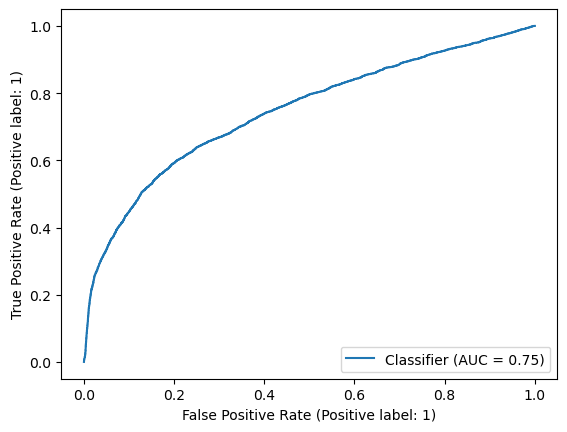

In [114]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [115]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[8372 2843]
 [1614 2874]]
recall 0.6403743315508021
precision 0.5027112121742172


**model2**

In [147]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

model2 = tf.keras.models.load_model(result_root+'19112022-1728-ResNet+tile+augmentation_10epochs_afo')

def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model2(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'
    
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 
tiled_test.to_csv(result_root+'19112022-1728-ResNet+tile+augmentation_10epochs_afo/test_prediction.csv')
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1000422756.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


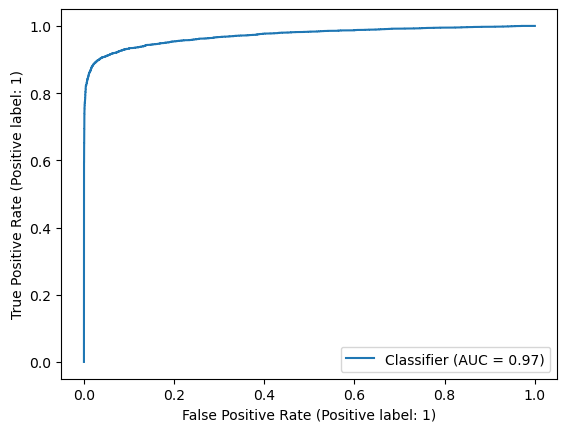

In [118]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [119]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[11076   139]
 [  620  3868]]
recall 0.8618538324420677
precision 0.9653107062640379


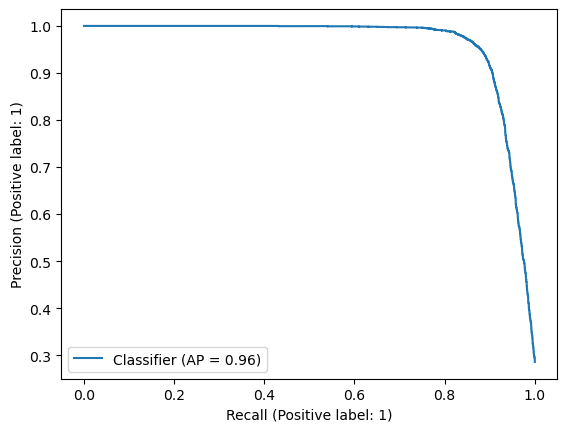

In [148]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_true,y_pred)

**model3**


In [128]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/2701866335.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


In [129]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

In [130]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [131]:
def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model3(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'

In [132]:
tiled_test

file_name humans
0      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...      1
1      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r...      1
2      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c...      1
3      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d...      1
4      /Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...      1
...                                                  ...    ...
11210  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0
11211  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0
11212  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0
11213  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0
11214  /Users/krish/ljmu/1.data/afo/tiledv2/test/fals...      0

[15703 rows x 2 columns]

In [133]:
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

In [134]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 

In [135]:
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

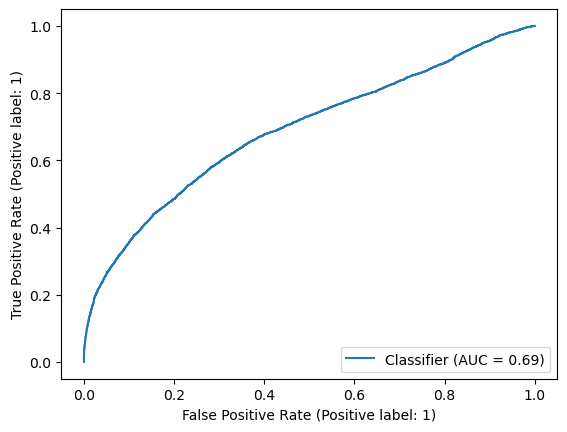

In [136]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [137]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[3472 7743]
 [ 764 3724]]
recall 0.8297682709447415
precision 0.32475800122089477


In [140]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_true,y_pred)

(array([0.28580526, 0.28582346, 0.28584167, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.45632799e-04, 2.22816399e-04, 0.00000000e+00]),
 array([6.9604104e-04, 1.6842517e-03, 1.7123807e-03, ..., 9.9910921e-01,
        9.9926418e-01, 9.9952912e-01], dtype=float32))

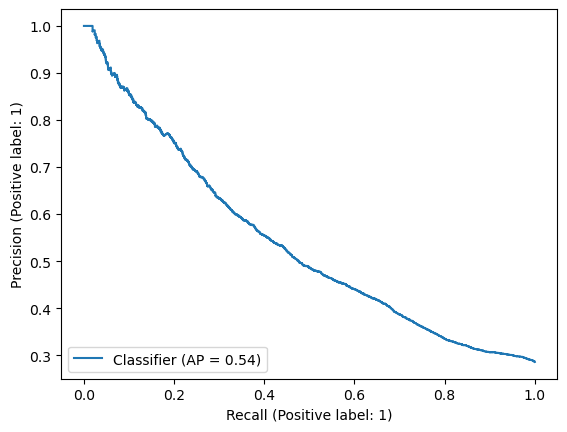

In [145]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_true,y_pred)

In [ ]:
# https://stats.stackexchange.com/questions/360017/when-is-an-auc-score-misleadingly-high
When to Use ROC vs. Precision-Recall Curves?
Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=ROC%20curves%20are%20appropriate%20when,are%20appropriate%20for%20imbalanced%20datasets.

In [6]:
import sys  
sys.path.insert(0, r'/Users/krish/ljmu/2.code')

import test_modular as th

In [8]:
th.tester()

hi da
